# CUSTOMER SEGMENTATION PROJECT

# Import libraries

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score


# 1. LOAD DATA

In [24]:
df = pd.read_excel("customers.dataset.xlsx")  
print("Dataset Shape:", df.shape)
print(df.head())


Dataset Shape: (400, 12)
   CustomerID  Age  Gender  Annual_Income  Spending_Score  Tenure  \
0           1   56  Female          78704              23       1   
1           2   46    Male          54099              15      10   
2           3   32  Female          23571              43       4   
3           4   60    Male          53044              29      12   
4           5   25  Female          66214              36      14   

   Purchase_Frequency  Satisfaction_Score Marital_Status Occupation  \
0                   3                   8         Single   Salaried   
1                  15                   6         Single    Student   
2                   2                   1        Married   Salaried   
3                  11                   4        Married   Business   
4                  11                   2        Married    Retired   

   Credit_Score  Monthly_Savings  
0           386            21446  
1           789            39198  
2           458            4

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CustomerID          400 non-null    int64 
 1   Age                 400 non-null    int64 
 2   Gender              400 non-null    object
 3   Annual_Income       400 non-null    int64 
 4   Spending_Score      400 non-null    int64 
 5   Tenure              400 non-null    int64 
 6   Purchase_Frequency  400 non-null    int64 
 7   Satisfaction_Score  400 non-null    int64 
 8   Marital_Status      400 non-null    object
 9   Occupation          400 non-null    object
 10  Credit_Score        400 non-null    int64 
 11  Monthly_Savings     400 non-null    int64 
dtypes: int64(9), object(3)
memory usage: 37.6+ KB


In [26]:
df.drop_duplicates()

CustomerID  Age  Gender  Annual_Income  Spending_Score  Tenure  \
0             1   56  Female          78704              23       1   
1             2   46    Male          54099              15      10   
2             3   32  Female          23571              43       4   
3             4   60    Male          53044              29      12   
4             5   25  Female          66214              36      14   
..          ...  ...     ...            ...             ...     ...   
395         396   38    Male          65109              80       1   
396         397   20  Female          74431              28      11   
397         398   31  Female          75401              77       6   
398         399   43    Male          42426              55      10   
399         400   22  Female          74157              37      11   

     Purchase_Frequency  Satisfaction_Score Marital_Status Occupation  \
0                     3                   8         Single   Salaried   
1                    15                   6         Single    Student   
2                     2                   1        Married   Salaried   
3                    11                   4        Married   Business   
4                    11                   2        Married    Retired   
..                  ...                 ...            ...        ...   
395                   4                   4         Single   Business   
396                   1                   5        Married   Salaried   
397                  14                   9        Married   Salaried   
398                  14                   6         Single   Salaried   
399                   2                  10         Single   Business   

     Credit_Score  Monthly_Savings  
0             386            21446  
1             789            39198  
2             458            48345  
3             641            41197  
4             542            42658  
..            ...              ...  
395           639            20003  
396           335            31102  
397           808            40887  
398           495            33903  
399           536             1476  

[400 rows x 12 columns]

In [27]:
df.describe()

CustomerID         Age  Annual_Income  Spending_Score      Tenure  \
count  400.000000  400.000000     400.000000      400.000000  400.000000   
mean   200.500000   40.780000   54452.020000       51.802500    5.777500   
std    115.614301   13.463274   25991.437806       24.236688    3.911681   
min      1.000000   18.000000   10841.000000        1.000000    1.000000   
25%    100.750000   30.000000   27937.000000       34.000000    2.000000   
50%    200.500000   39.000000   54131.000000       55.000000    5.000000   
75%    300.250000   54.000000   75175.250000       70.000000    9.000000   
max    400.000000   67.000000  104459.000000      100.000000   15.000000   

       Purchase_Frequency  Satisfaction_Score  Credit_Score  Monthly_Savings  
count          400.000000          400.000000    400.000000       400.000000  
mean             7.835000            5.680000    573.482500     24187.637500  
std              4.471887            2.908392    168.439021     13605.289116  
min              1.000000            1.000000    300.000000      1262.000000  
25%              4.000000            3.000000    424.250000     13236.750000  
50%              8.000000            6.000000    565.500000     23860.000000  
75%             12.000000            8.000000    732.000000     35162.750000  
max             15.000000           10.000000    850.000000     49756.000000

# Histograms

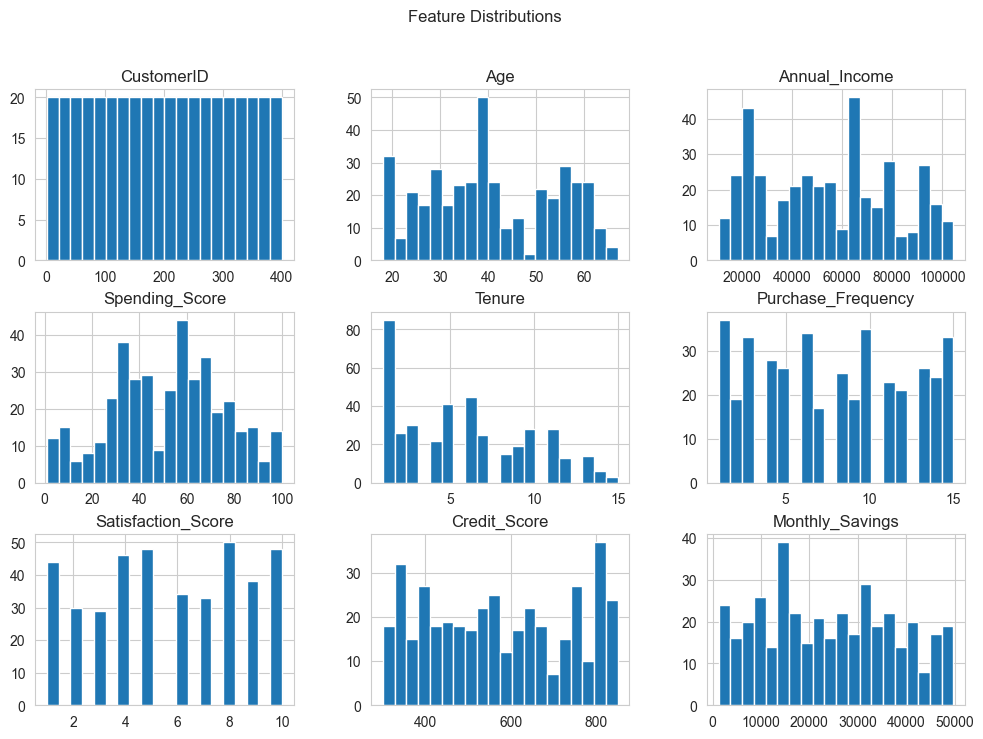

In [28]:
df.hist(figsize=(12,8), bins=20)
plt.suptitle("Feature Distributions")
plt.show()

# Correlation heatmap

In [29]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# 3. DATA SCALING

In [13]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df.select_dtypes(include=[np.number]))
scaled_df = pd.DataFrame(scaled_data, columns=df.select_dtypes(include=[np.number]).columns)

# 4. ELBOW METHOD

In [14]:
inertia = []
K = range(2, 11)
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(scaled_df)
    inertia.append(kmeans.inertia_)

plt.plot(K, inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

# 5. SILHOUETTE SCORE

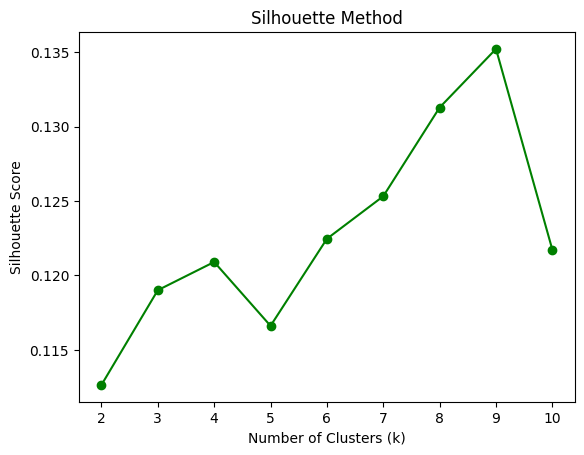

In [15]:
silhouette_scores = []
for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(scaled_df)
    sil_score = silhouette_score(scaled_df, labels)
    silhouette_scores.append(sil_score)

plt.plot(K, silhouette_scores, marker='o', color='green')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method')
plt.show()

# Choose best k (based on visual)

# change based on elbow/silhouette output

In [16]:
best_k = 4 

# 6. K-MEANS CLUSTERING

In [17]:
kmeans = KMeans(n_clusters=best_k, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_df)
print(df['Cluster'].value_counts())

Cluster
1    104
0    101
2    100
3     95
Name: count, dtype: int64


# 7. PCA FOR VISUALIZATION

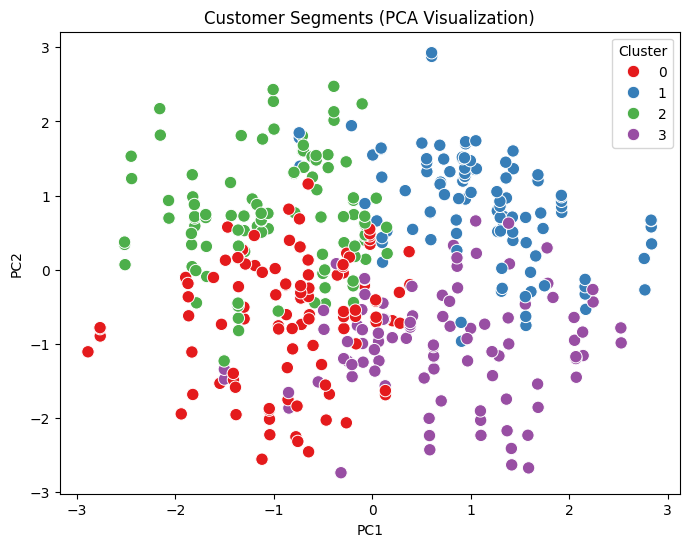

In [18]:
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2'])
pca_df['Cluster'] = df['Cluster']

plt.figure(figsize=(8,6))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='Cluster', palette='Set1', s=80)
plt.title('Customer Segments (PCA Visualization)')
plt.show()

# 8. SCATTERPLOTS BETWEEN FEATURES

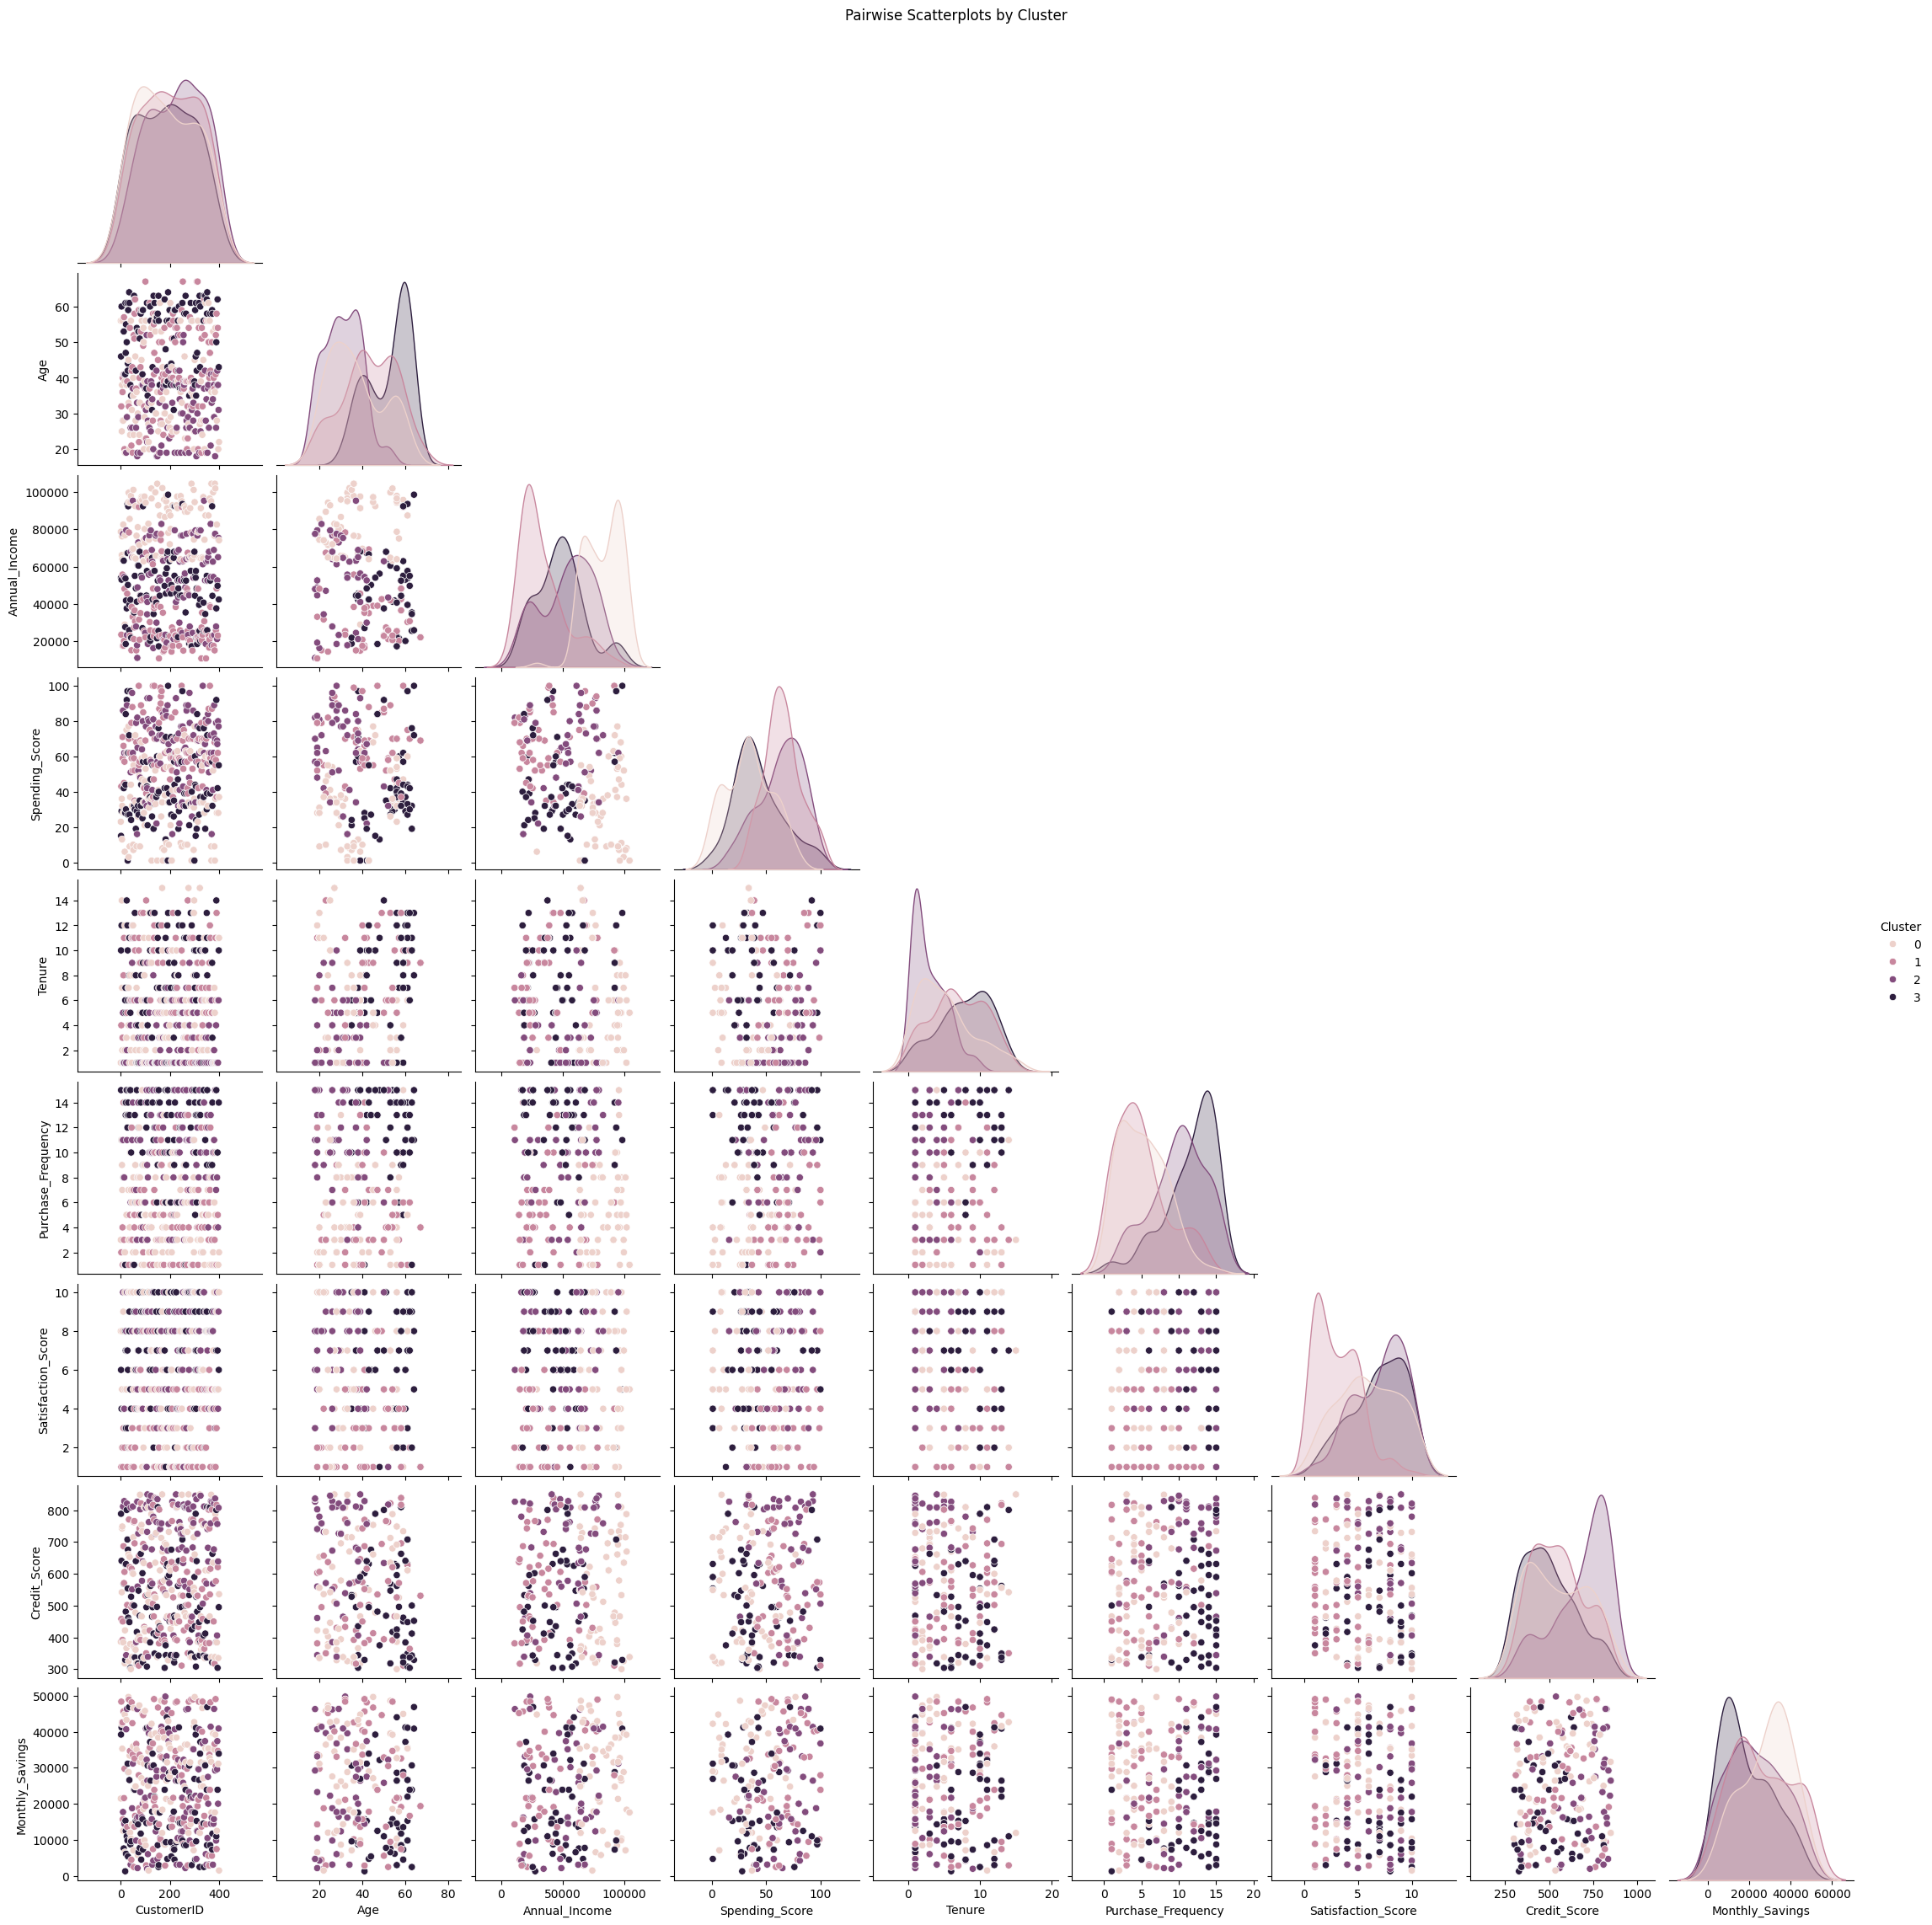

In [19]:
sns.pairplot(df, hue='Cluster', corner=True)
plt.suptitle("Pairwise Scatterplots by Cluster", y=1.02)
plt.show()

# 9. CLUSTER INSIGHTS

In [20]:
cluster_summary = df.groupby('Cluster').mean(numeric_only=True)
print("Cluster Summary:\n", cluster_summary)

Cluster Summary:
          CustomerID        Age  Annual_Income  Spending_Score    Tenure  \
Cluster                                                                   
0        188.346535  37.227723   82721.712871       34.376238  5.306931   
1        201.182692  43.403846   33712.942308       65.269231  6.942308   
2        224.300000  30.930000   53492.840000       63.570000  3.040000   
3        187.621053  52.052632   48110.368421       43.200000  7.884211   

         Purchase_Frequency  Satisfaction_Score  Credit_Score  Monthly_Savings  
Cluster                                                                         
0                  5.168317            5.930693    551.405941     28525.900990  
1                  5.000000            3.048077    551.115385     26228.442308  
2                  9.950000            7.020000    687.500000     22830.190000  
3                 11.547368            6.884211    501.421053     18770.126316  


# Visualize cluster profiles

<Figure size 1000x600 with 0 Axes>

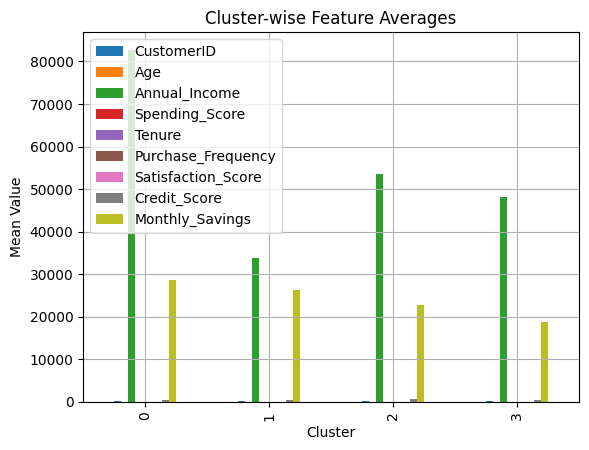

In [21]:
plt.figure(figsize=(10, 6))
cluster_summary.plot(kind='bar')
plt.title("Cluster-wise Feature Averages")
plt.xlabel("Cluster")
plt.ylabel("Mean Value")
plt.legend(loc="best")
plt.grid(True)
plt.show()